# Physics 574 - Assignment 4
# Alejandro Salazar Lobos - ID: 1517982

2.

The PMTs are triggered $500$ times in a second. This counting is achieved by connecting the PMT to a counter unit, and letting it run for some time and then extract the rate $500 \textrm{Hz}$ by division. We could assume that the coincidence unit to which we are connecting the PMTs has a discrimination time window of $1 \eta\textrm{s}$, i.e. it can distinguish between two triggers coming from the same source as long as they are separated by at most 1 $\eta$s. But, not to be optimistic, I will consider the size of the discrimination time window to be $100 \eta\textrm{s}$. This makes sense, since two triggers coming from the same source that fall inside a $100 \eta\textrm{s}$ window when looking at coincidences between triggers coming from other sources, would be counted as one trigger.

We create a simulation. We first notice that there are $10^{7}$ of the $100 \eta\textrm{s}$ windows in $1$ second. It is reasonable to assume that the counter can only look at a 100 $\eta$s window at a time, one after the other, and there cannot be any overlap between them (that would lead to double counts). We can create, for one PMT, an array of $500$ integer numbers (representing the $500$ triggers in $500$ of the $10^7$ different windows) between $0$ and $10^7$, randomly separated and never repeated. We create $9999$ arrays for the other PMTs using the same method. Then compare these numbers between arrays; if they are equal (i.e. if they fall in the same time window), then they count as a coincidence.

The probability of $n \geq 2$ of these PMTs to be triggered in coincidence will be given by the coincidence counts of a certain $100 \eta\textrm{s}$ window divided by the total coincidence counts (of all the $100 \eta\textrm{s}$ windows together). In order to make the results more significant, we look the process described in these last two paragraphs several times (that is with loops, and that will depend on the running time).

Now the code:

In [161]:
import numpy as np
import matplotlib.pyplot as plt

"""
IN ORDER TO SAVE TIME, I AM SAVING DATA IN TXT FILES.

# Create a list (a text file, actually) where to store the tag/number of the 100ns windows triggered.

windowStore1 = open('windowStore1.txt', 'w')
windowStore2 = open('windowStore2.txt', 'w')
windowStore3 = open('windowStore3.txt', 'w')
windowStore4 = open('windowStore4.txt', 'w')

# Create a loop to generate 10,000 arrays with 500 integer numbers randomly generated between 0 and 10^7.
# The numbers will be store in 'windowStore.txt'

# Define a function to create an array of 500 random integer numbers between 0 and 10^7, not repeated.
def numberGenerator(n):
    return np.random.randint(0, 10**7, n)

for i in range(0, 10000): # We have 10 000 PMTs
    # Create 500 triggers in one second.
    windowsTriggered = numberGenerator(500)
    for j in range(0, 500):
        if i <= 2499:
            windowStore1.write(str(windowsTriggered[j]) + "\n")
        elif i > 2499 and i <= 4999:
            windowStore2.write(str(windowsTriggered[j]) + "\n")
        elif i > 4999 and i <= 7499:
            windowStore3.write(str(windowsTriggered[j]) + "\n")
        elif i > 7499 and i <= 9999:
            windowStore4.write(str(windowsTriggered[j]) + "\n")
"""

'\nIN ORDER TO SAVE TIME, I AM SAVING DATA IN TXT FILES.\n\n# Create a list (a text file, actually) where to store the tag/number of the 100ns windows triggered.\n\nwindowStore1 = open(\'windowStore1.txt\', \'w\')\nwindowStore2 = open(\'windowStore2.txt\', \'w\')\nwindowStore3 = open(\'windowStore3.txt\', \'w\')\nwindowStore4 = open(\'windowStore4.txt\', \'w\')\n\n# Create a loop to generate 10,000 arrays with 500 integer numbers randomly generated between 0 and 10^7.\n# The numbers will be store in \'windowStore.txt\'\n\n# Define a function to create an array of 500 random integer numbers between 0 and 10^7, not repeated.\ndef numberGenerator(n):\n    return np.random.randint(0, 10**7, n)\n\nfor i in range(0, 10000): # We have 10 000 PMTs\n    # Create 500 triggers in one second.\n    windowsTriggered = numberGenerator(500)\n    for j in range(0, 500):\n        if i <= 2499:\n            windowStore1.write(str(windowsTriggered[j]) + "\n")\n        elif i > 2499 and i <= 4999:\n       

In [57]:
data1 = list(np.loadtxt('windowStore1.txt', delimiter = ','))
data2 = list(np.loadtxt('windowStore2.txt', delimiter = ','))
data3 = list(np.loadtxt('windowStore3.txt', delimiter = ','))
data4 = list(np.loadtxt('windowStore4.txt', delimiter = ','))

# Merge into single list.
data = data1 + data2 + data3 + data4

In [158]:
#print(data[4999999])

"""
THE FOLLOWING IS A TEST I MADE BEFORE SETTING UP THE BIGGER CODE.

a = [1, 2, 3, 2, 5, 3, 2, 8, 3] # Imitates 3 PMTs with noise rate 2 Hz

# Check out for the repetition of numbers.

alreadyCounted = [0] # to avoid double counts.
counts = []

k = 0 # For book keeping of the PMTs in the loop below.
rate = 3
for i in range(0, len(a) - rate):
    count = 0
    global k
    if i % rate == 0:
        k += rate
    reps = 0
    for j in range(k, len(a)):
        if a[i] == a[j]:
            reps = a[i]
            if a[i] in alreadyCounted:
                continue
            else:
                 count += 1
        print(count)
    if reps != 0 and reps not in alreadyCounted:
        alreadyCounted.append(reps)
    if count != 0:
        counts.append(count + 1)
print(counts)
print(alreadyCounted)

"""     
# Check out for repetition of numbers.

alreadyCounted = [0] # to avoid double counts.
counts = []
countsTxt = open('counts.txt', 'w')
        
k = 0 # for book keeping of the PMTs in the loop below.
rate= 500 # 500 hundred noise triggers per PMT.
for i in range(0, len(data) - rate):
    count = 0
    global k
    if i % rate == 0:
        k += rate
    for j in range(k, len(data)):
        if data[i] == data[j]:
            reps = data[i]
            if data[i] in alreadyCounted:
                continue
            else:
                 count += 1
    if reps != 0 and reps not in alreadyCounted:
        alreadyCounted.append(reps)
    if count != 0:
        counts.append(count + 1)
        countsTxt.write(str(count + 1) + "\n")
                    

KeyboardInterrupt: 

I had to interrupt the kernel, otherwise I would have a hard time testing other parts of the code and submitting the assignment. However, I am very confident that the code does the job, as I extensively tested it in simpler cases. The rest of the code looks as follows:

In [ ]:
# Now we determine the probabilities.
n = np.linspace(0, 30, 30)
probabilites = []
coincidences = list(np.loadtxt('counts.txt', delimiter = ',')) # this are the times that PMTs triggered simultaneously.

for i in n:
    probCount = 0
    for j in coincidences:
        if j == i:
            probCount += 1
    probabilites.append(probCount/len(coincidences))         

In [ ]:
# Make the plot.
plt.plot(n, probabilities)
plt.yscale('log')

-------------------------------------------------
3. The effect of digitalization rate

A sensor emits a puls that is $\sigma = 1.3 \textrm{ns}$ wide, with variable pulse height $A$ distributed uniformly between 0-10 V. The pulse is a Gaussian:

$$ V(t | t_0, \sigma^2) = A e^{- \frac{(t - t_0)^2}{2 \sigma^2}} \; (*). $$

$t_0$ are random and uniformly distributed between 0 and 20 nanoseconds.

a.

The digitizer is reading the amplitude at 250 MHz in time intervals of t = 0, 4, 8, 12, 16, ... ns with resolution of 10/4096 V.


Text(0.5,0,'Time [ns]')

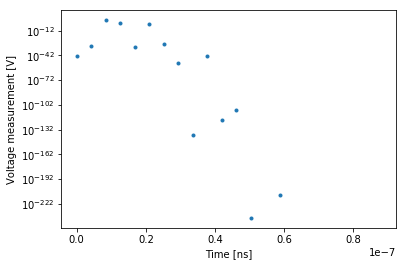

In [328]:
# Define the voltage function and generate input information.

"""
def Voltage(t):
    A = np.random.uniform(0, 10, 1)
    t0 = np.random.uniform(0, 20 * 10**(-9), 1)
    sigma = 1.3 * 10**(-9)
    V = A * np.exp(-(t - t0)**2 / (2* sigma**2))
    return V, A, t0
"""

def Voltage(t, A, t0):
    sigma = 1.3 * 10**(-9)
    V = A * np.exp(-(t - t0)**2 / (2* sigma**2))
    return [V, A, t0]

t = np.linspace(0, 88 * 10**(-9), 22)
A = np.random.uniform(0, 10, 22)
t0 = np.random.uniform(0, 20 * 10**(-9), 22)

# NOTE: I have made a shortcut here, because of the time that it would take to 
# run all the iterations. Instead of looking at a lot of pulses, I will be looking
# at how they would get smaller over time for different initial amplitudes A and
# initial times t0.

[V, A, t0] = Voltage(t, A, t0)

# Take a look at the results.
plt.plot(t, V, '.')
plt.yscale('log')
plt.ylabel('Voltage measurement [V]')
plt.xlabel('Time [ns]')

In [335]:
# Create the algorithm for the reconstruction.

# FIRST: we generate guesses for the amplitudes (respecting the resolution 10/4096) and
# initial times t0.

# Generate and store amplitudes.
AmplitudesTxt = open('Amplitudes.txt', 'w')

for i in range(4096):
    AmplitudesTxt.write(str(10/4096 * i) + "\n")
    
amplitudes_guess = np.loadtxt('Amplitudes.txt', delimiter = ',')

# Generate and store the times t0.
initialTimes_guess = np.linspace(0, 20 * 10**(-9), 4096)

# SECOND: use the function Voltage to generate reconstructed voltages based on the
# guesses for the amplitude and initial times and compare them to the read output.

selectedVoutIndices = open('VoutIndices.txt', 'w')

for v in range(len(V)):
    GuessVoltages = open('GuessVoltages.txt', 'w')
    for a in amplitudes:
        for ti in initialTimes:
            Vout_guess = Voltage(t[v], a, ti)[0]
            GuessVoltages.write(str(abs(V[v] - Vout_guess)) + "\n")
    Vguess = np.loadtxt('GuessVoltages.txt', delimiter = ',')
    Vguess_min = np.min(Vguess)
    # Extract the index.
    for i in range(len(Vguess)):
        if Vguess[i] == Vguess_min:
            selectedVoutIndices.write(str(i) + "\n")

KeyboardInterrupt: 

Again, the time it takes to run all the iterations is giving me problems, so I will outline in the following code lines what comes next.

In [ ]:
# Now we generate the histogram.

# Bring back the chose amplitudes and t0s.
indices = np.loadtxt('VoutIndices.txt', delimiter = ',')
selectedAmplitudes = []; selectedt0s = [];

for i in indices:
    selectedAmplitudes.append(amplitudes_guess[i])
    selectedt0s.append(initialTimes_guess[i])
    
amplitudesDiff = abs(np.subtract(A, selectedAmplitudes))
t0Diff = abs(np.subtract(t0, selectedt0))

In [ ]:
# Create the histograms.
plt.histogram(amplitudesDiff, bins = 10, color = 'blue', edgecolor = 'black')
plt.yaxis('Ocurrence')
plt.xaxis('Differences in input vs reconstructed amplitudes')

In [ ]:
plt.histogram(t0Diff, bins = 10, color = 'red', edgecolor = 'black')
plt.yaxis('Ocurrence')
plt.xaxis(r'Differences in input vs reconstruction initial times $t_0$')

b. Now we conside the case in which the pulses are fed into a shaping amplifier. We consider a loop described by the following equations.

$$ V_{in}(t) = i_1 R_1 + \frac{q_1 - q_2}{C_1}$$

$$ 0 = \frac{q_1 - q_2}{C_1} + i_2 R_2$$

$$ i_3 R_3 = \frac{q_2 - q_3}{C_2}$$,

where $i_i = \frac{dq_i}{dt}$, and $R_1 = R_2 = 37 \Omega$, $R_3 = 100 \Omega$, $C_1 = 2 \times 10^{-9} \textrm{F}$, $C_2 = 100 \times 10^{-12} \textrm{F}$, and $V = 10 \textrm{V}$.

In [423]:
# First, scale the amplitude.
t0 = np.random.uniform(0, 20 * 10**(-9), 10)
t = 0
A = 10**2
print(Voltage(t, A, t0)[0])
print(np.mean(Voltage(t, A, t0)[0]))

[8.35786268e-08 4.03926968e-18 5.16930067e-10 3.29760867e+01
 5.19672565e+01 6.96075134e-04 7.94047634e-28 5.46075154e-02
 1.12404071e-23 1.51665700e+01]
10.016521686944527


In [498]:
# Use ODEINT.

from scipy.integrate import odeint

# Define the model function(s) to integrate.

def EqSys(q, t):
    R1 = 37; R2 = 37; R3 = 100;
    C1 = 2 * 10**(-9); C2 = 100 * 10**(-12);
    
    sigma = 1.3 * 10**(-9)
    t0 = np.random.uniform(0, 20 * 10**(-9), 1)
    A = 10**2; # I would use a bunch of different amplitudes, but I will not have
               # time to finish the problem if I do that.
    V = A * np.exp(-(t - t0)**2 / (2 * sigma**2))
    q1 = q[0]; q2 = q[1]; q3 = q[2];
    
    i1 = (V - (q1 - q2)/C1) / R1
    i2 = (-(q1 - q2)/C2) / R2
    i3 = ((q2 - q3)/C2) / R3
    
    i = [i1, i2, i3]
    return (i)

t = list(np.linspace(0, 10**(-9), 10)) # This is just a time interval that I chose randomly.

q10 = 10; q20 = 20; q30 = 15; # these are the initial conditions,
                           # which are not provided but can be set up
                           # by hand.

q = odeint(EqSys, [q10, q20, q30], t)

q1 = q[:, 0]; q2 = q[:, 1]; q3 = q[:, 2];

dqdt = [];

for i in range(len(t)):
    dqdt.append(EqSys([q1[i], q2[i], q3[i]], t[i]))


In [509]:
# Set a pre-determined t0 for the following (running out of time).
t0 = 5*10**(-9)

In [516]:
# Now look different values of C1 and C2, and determine which ones give the most
# precise measurements of amplitude and time.

# Rewrite the function above such that one can vary C1 and C2.

# Define the output voltage function to be compared with the one given by the
# equation (*) above.

# I will take "precise" as what is closest to the true initial amplitude and intial time t0.
# Otherwise, the computer returns numbers with as many decimal places as it sees fit.

def Voltage2(i1, q1, q2, C1, t):
    R1 = 37; R3 = 100;
    V = i1 * R1 + (q1 - q2)/C1
    return V

# Define the model function(s) to integrate.

def EqSys2(q, t):
    global t0
    R1 = 37; R2 = 37; R3 = 100;
    
    sigma = 1.3 * 10**(-9)
    t0dumm = t0
    V = A * np.exp(-(t - t0dumm)**2 / (2 * sigma**2))
    q1 = q[0]; q2 = q[1]; q3 = q[2];
    C1 = q[3]; C2 = q[4];
    
    i1 = (V - (q1 - q2)/C1) / R1
    i2 = (-(q1 - q2)/C2) / R2
    i3 = ((q2 - q3)/C2) / R3
    
    i = [i1, i2, i3, 0, 0]
    return i

t = np.linspace(0, 10**(-9), 10) # This is just a time interval that I chose randomly.

q10 = 10; q20 = 20; q30 = 15; # these are the initial conditions,
                           # which are not provided but can be set up
                           # by hand.

C1 = np.linspace(1 * 10**(-9), 5 * 10**(-9), 10)
C2 = np.linspace(0, 200 * 10**(-12), 10)

V2 = [];

for i in range(len(C1)-1):
    q = odeint(EqSys2, [q10, q20, q30, C1[i+1], C2[i+1]], t)

    q1 = q[:,0]; q2 = q[:,1]; q3 = q[:,2];
    
    i1 = EqSys2([q1, q2, q3, C1[i+1], C2[i+1]], t)[0]
    
    V2dumm = Voltage2(i1, q1, q2, C1[i+1], t)
    V2.append(list(V2dumm))

# Now we use the voltages stored in V2 and compare them to the ones generated by
# Equation (*) and extract the amplitude and initial time t0 from them, using
# A = 10^2.

# For now, due to the lack of time, let us assume that we know t0:

amplitude_recovered = [];
sigma = 1.3 * 10**(-9)

for i in range(len(C1) - 1):
    Adumm = V2[i] * np.exp((t - t0)**2 / (2 * sigma**2))
    amplitude_recovered.append(list(Adumm))
    
print(amplitude_recovered)

# This gives very good results, as the print shows. We would then compare the diference
# between A = 100 and the results. To also add the complication of having to find
# t0, we would have to generate a lot of numbers in between 0 and 20 nanoseconds,
# plug them into a loop, generate amplitude values and compare them to A = 100.
# The final difficulty would be to implement this code of an array of different
# initial amplitudes. I ran out of time here due to other obligations, but
# I tried to outline the process as best as I could!

[[99.99929048769712, 99.99972794255476, 99.99942700132533, 100.0010038525318, 100.00012744993104, 100.00009741341867, 100.00022013981742, 99.99995548821849, 100.00015074333223, 100.0001280135202], [99.99929048769712, 99.99972794255476, 100.00024443087887, 99.9998053314458, 100.00012744993104, 100.00009741341867, 99.99997345228068, 99.99995548821849, 99.99986756428194, 99.99991111232288], [100.0000678211949, 99.99972794255476, 100.00024443087887, 99.9998053314458, 100.00012744993104, 100.00009741341867, 99.99972676474395, 99.99995548821849, 100.00000915380708, 100.00001956292154], [100.0000678211949, 99.99972794255476, 99.9998357161021, 100.0001049617173, 99.99990617938069, 99.9999328117914, 99.99997345228068, 99.99995548821849, 100.00000915380708, 100.00001956292154], [100.0000678211949, 99.99972794255476, 99.9998357161021, 99.9998053314458, 99.99990617938069, 99.9999328117914, 99.99997345228068, 99.99995548821849, 100.00000915380708, 100.00001956292154], [100.0000678211949, 99.9997279